# ***** Libraries ***** 

In [39]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

# ***** References ***** 

* (Zhang, 2018) -- Zhang, B. (2018). The Physics of Gamma-Ray Bursts. Cambridge: Cambridge University Press. doi:10.1017/9781139226530

* FERMIGBRST - Fermi GBM Burst Catalog https://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermigbrst.html

* (Yonetoku, 2004) -- Yonetoku, D., Murakami, T., Nakamura, T., Yamazaki, R., Inoue, A. K., and Ioka, K., “Gamma-Ray Burst Formation Rate Inferred from the Spectral Peak Energy-Peak Luminosity Relation”, <i>The Astrophysical Journal</i>, vol. 609, no. 2, pp. 935–951, 2004. doi:10.1086/421285.

# ***** Functions *****

In [40]:
def get_E_peak_rest_frame(E_peak_obs,redshift):
    """
    Returns rest-frame peak energy
    
    E_peak_obs -- observed peak energy, from catalogue
    redshift -- redshift of object
    
    (Zhang, 2018, p. 102)
    
    """
    
    return (1 + redshift) * E_peak_obs

def get_L_iso_bol_peak():
    """
    
    """
    pass

# ***** Data *****

## - - - - - - - - - - - - - 
## (Yonetoku, 2004)

### --- Figure 1 and Table 1 ---

In [62]:
yonetoku_data_st = pd.read_csv("2004_yonetoku_grb_table_2.csv")

In [65]:
yonetoku_data_st.columns

Index(['grb', 'redshift', 'ra', 'dec', 'Ep(1+z), (keV)',
       'peak flux, (10-6ergs cm-2s-1)', 'Peak Luminosity,  1052ergs s-1',
       'hi2/dof', 'k_c'],
      dtype='object')

Text(0, 0.5, '$Luminosity~[\\times 10^{52} erg/s]$')

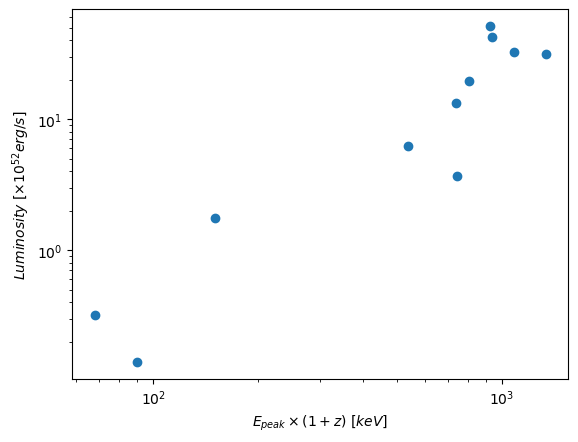

In [77]:
plt.scatter(yonetoku_data_st["Ep(1+z), (keV)"],yonetoku_data_st["Peak Luminosity,  1052ergs s-1"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{peak} \times (1 + z)~[keV]$")
plt.ylabel(r"$Luminosity~[\times 10^{52} erg/s]$")

### --- Table 2 ---

In [37]:
yonetoku_data = pd.read_csv("2004_yonetoku_grb_energy_luminocity.csv")

In [38]:
yonetoku_data

,trigger_number,Ep,E_Ep,e_Ep,z,E_z,e_z,Lum,E_Lum,e_Lum
0,105,141.4,7.5,7.8,1.26,0.10,0.11,2.39E+52,4.300000e+51,5.200000e+51
1,109,385.4,18.8,20.7,1.98,0.17,0.20,3.10E+53,6.000000e+52,8.200000e+52
2,111,97.2,20.6,21.7,11.23,6.51,33.87,3.32E+53,2.870000e+53,6.720000e+54
3,130,182.2,7.1,7.4,5.17,0.57,0.68,2.97E+53,7.100000e+52,9.900000e+52
4,133,73.9,28.3,25.4,4.53,2.89,9.47,3.92E+52,3.580000e+52,4.820000e+53
...,...,...,...,...,...,...,...,...,...,...
684,8099,79.5,11.3,12.1,0.74,0.13,0.15,4.49E+51,1.660000e+51,2.540000e+51
685,8105,17.1,5.4,5.5,0.41,0.14,0.15,1.36E+50,8.400000e+49,1.550000e+50
686,8111,354.5,88.3,46.6,7.98,4.60,6.05,2.38E+54,2.060000e+54,6.150000e+54
687,8116,241.2,18.2,30.7,11.78,3.44,12.32,2.23E+54,1.210000e+54,8.690000e+54


In [41]:
E_peak_z = get_E_peak_rest_frame(yonetoku_data["Ep"],yonetoku_data["z"])

In [53]:
for ind,l in enumerate(yonetoku_data["Lum"]):
    yonetoku_data["Lum"][ind]=float(l)

/var/folders/kv/prhthx396zd4k1d7f55bdztc0000gn/T/ipykernel_68849/382217422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yonetoku_data["Lum"][ind]=float(l)


Text(0, 0.5, '$Luminosity~[\\times 10^{52}~erg/s]$')

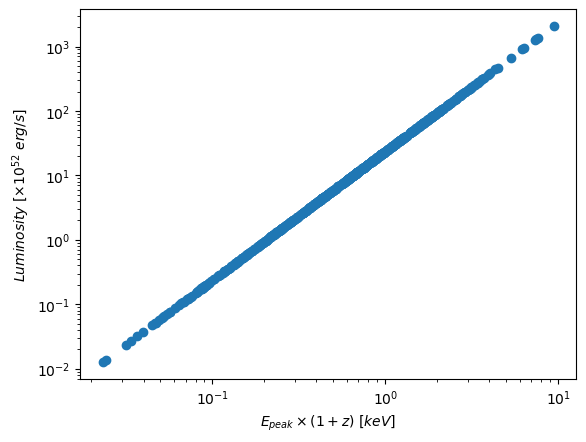

In [74]:
plt.scatter(E_peak_z/1e3,yonetoku_data["Lum"]/1e52)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{peak} \times (1 + z)~[keV]$")
plt.ylabel(r"$Luminosity~[\times 10^{52}~erg/s]$")

## - - - - - - - - - - - - - 

## Fermi

(FERMIGBRST)

* 	trigger_time <= 2022-12-31 23:59:59.999 UTC
*  	t90 (s) <= 2

In [7]:
table = Table.read("fermi_results_short_2022.fits")
data = table.to_pandas()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Columns: 306 entries, NAME to LAST_MODIFIED
dtypes: float64(290), int16(2), object(14)
memory usage: 1.3+ MB


In [5]:
data.columns

Index(['NAME', 'RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START',
       'FLUENCE', 'FLUENCE_ERROR', 'FLUX_1024',
       ...
       'FLNC_SBPL_PHTFLNCB_ERROR', 'FLNC_SBPL_ERGFLNCB',
       'FLNC_SBPL_ERGFLNCB_ERROR', 'FLNC_SBPL_REDCHISQ',
       'FLNC_SBPL_REDFITSTAT', 'FLNC_SBPL_DOF', 'FLNC_SBPL_STATISTIC',
       'BCATALOG', 'SCATALOG', 'LAST_MODIFIED'],
      dtype='object', length=306)